DSCI 352 
Tara Erberich 
Student ID: 9237580532

Problem 1
    (a) Download the data

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

data = pd.read_excel('Data2/Folds5x2_pp.xlsx',sheet_name = 1);
data

,AT,V,AP,RH,PE
0,9.59,38.56,1017.01,60.10,481.30
1,12.04,42.34,1019.72,94.67,465.36
2,13.87,45.08,1024.42,81.69,465.48
3,13.72,54.30,1017.89,79.08,467.05
4,15.14,49.64,1023.78,75.00,463.58
...,...,...,...,...,...
9563,17.10,49.69,1005.53,81.82,457.32
9564,24.73,65.34,1015.42,52.80,446.92
9565,30.44,56.24,1005.19,56.24,429.34
9566,23.00,66.05,1020.61,80.29,421.57


Problem 1
    (b)
           i. How many rows and columns are in the data? What do the rows
           and columns represent?
    

In [108]:
data.info();

# 5 columns and 9568 rows
# Rows are 6 years worth of data points from a power plant
# Columns are Temperature, Ambient Pressure, Relative Humidity, Exhust Vacuum, Energy Output

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


Problem 1
    (b)
           ii. Make pairwise scatterplots of all variables including 
           predictors(independent). Describe findings.

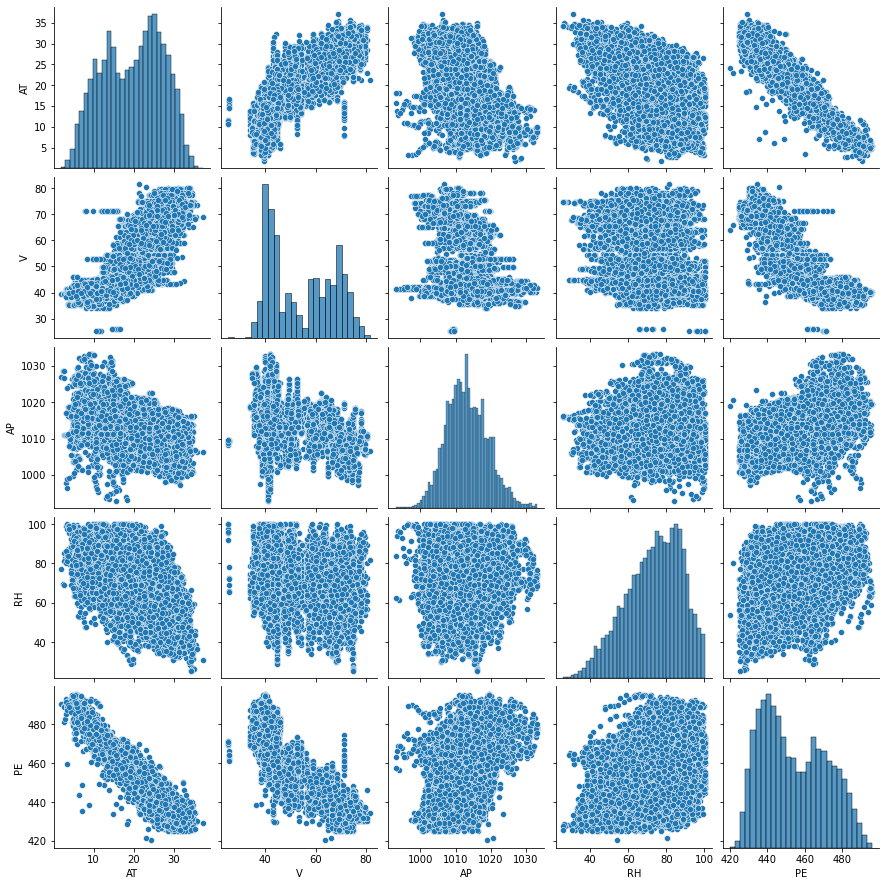

In [109]:
sb.pairplot(data)

The scatterplots show that (AT vs V), (V vs AT) have a positive linear relationship. (AT vs PE), (V vs PE), (PE vs AT), (PE vs V) all have negative linear relationships. All other scatterplots do not show significant relationships except for obvious outliers. 

Problem 1
    (b)
           iii. What are the mean, the median, range, first and third 
           quartiles, and interquartile ranges of each of the variables 
           in the dataset? Summarize them in a table.

In [110]:
des = pd.DataFrame(data.describe())
IQR= {'Variable' : ['AT', 'V', 'AP', 'RH', 'PE'], 
        'IQR' :  [ (13.510000-25.720000), (41.740000-66.540000),(1009.100000 - 1017.260000), (63.327500-84.830000), (439.750000-468.430000)]}
IQR = pd.DataFrame(IQR)
display(des)
display(IQR)

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


,Variable,IQR
0,AT,-12.2100
1,V,-24.8000
2,AP,-8.1600
3,RH,-21.5025
4,PE,-28.6800


Problem 1
    (c)
        For each predictor, fit a simple linear regression model to 
        predict the response. Describe your results. In which of the 
        models is there a statistically significant association between 
        the predictor and the response? Create some plots to back up your 
        assertions. Are there any outliers that you would like to remove 
        from your data for each of these regression tasks?

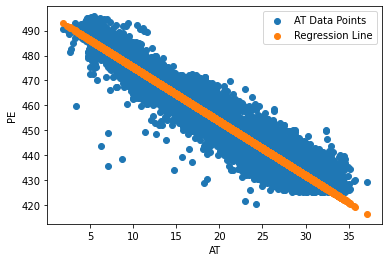

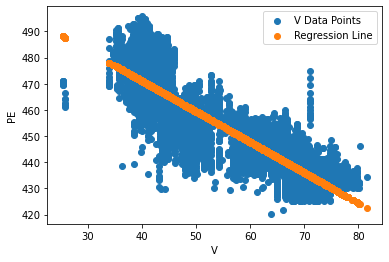

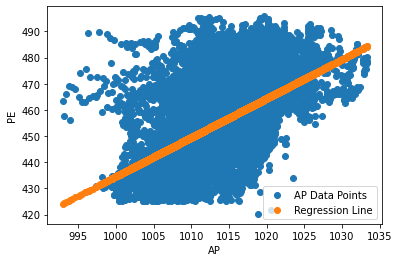

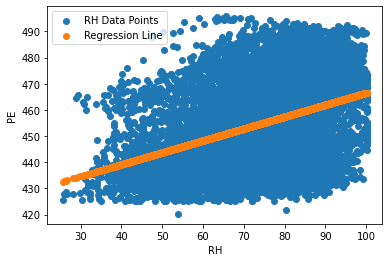

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Fri, 26 Feb 2021   Prob (F-statistic):               0.00
Time:                        20:42:43   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AT            -2.1713      0.007   -291.715      0.0

In [111]:
# simple linear regression model
# AT
x_train_AT = data['AT'].copy()
x_train_AT = sm.add_constant(x_train_AT, prepend = False)

fit_AT = sm.OLS(data['PE'], x_train_AT).fit()
sum_AT = fit_AT.summary()


pred_AT = fit_AT.predict(x_train_AT)
plt.scatter(data['AT'], data['PE'], label = 'AT Data Points')
plt.scatter(data['AT'], pred_AT, label = 'Regression Line')
plt.xlabel('AT')
plt.ylabel('PE')
plt.legend()
plt.show()

#V
x_train_V = data['V'].copy()
x_train_V = sm.add_constant(x_train_V, prepend = False)

fit_V = sm.OLS(data['PE'], x_train_V).fit()
sum_V = fit_V.summary()


pred_V = fit_V.predict(x_train_V)
plt.scatter(data['V'], data['PE'], label = 'V Data Points')
plt.scatter(data['V'], pred_V, label = 'Regression Line')
plt.xlabel('V')
plt.ylabel('PE')
plt.legend()
plt.show()
#AP
x_train_AP = data['AP'].copy()
x_train_AP = sm.add_constant(x_train_AP, prepend = False)

fit_AP = sm.OLS(data['PE'], x_train_AP).fit()
sum_AP = fit_AP.summary()


pred_AP = fit_AP.predict(x_train_AP)
plt.scatter(data['AP'], data['PE'], label = 'AP Data Points')
plt.scatter(data['AP'], pred_AP, label = 'Regression Line')
plt.xlabel('AP')
plt.ylabel('PE')
plt.legend()
plt.show()

#RH
x_train_RH = data['RH'].copy()
x_train_RH = sm.add_constant(x_train_RH, prepend = False)

fit_RH = sm.OLS(data['PE'], x_train_RH).fit()
sum_RH = fit_RH.summary()


pred_RH = fit_RH.predict(x_train_RH)
plt.scatter(data['RH'], data['PE'], label = 'RH Data Points')
plt.scatter(data['RH'], pred_RH, label = 'Regression Line')
plt.xlabel('RH')
plt.ylabel('PE')
plt.legend()
plt.show()

# https://www.delftstack.com/howto/matplotlib/how-to-set-marker-size-of-scatter-plot-in-matplotlib/

#print(x_train_AT,x_train_V,x_train_AP,x_train_RH)
print(sum_AT, sum_V, sum_AP, sum_RH)

# Plot All Predictors & Look for Outliers







All regression models show p < 0.05 meaning every predictor is significant. Predictors AT, V, and AP all have outliers that would need to be removed just from looking at the regression models. Both AT and V have high R^2 meaning those models explain a lot of the variation. Both AP and RH have low R^2 meaning those models do not explain a lot of variation.

Problem 1
    (d)
        Fit a multiple regression model to predict the response using all 
        of the predictors. Describe your results. For which predictors 
        can we reject the null hypothesis H0 : Bj = 0?

In [112]:
x_train_all = data[['AT', 'V', 'AP', 'RH']].copy()
x_train_all = sm.add_constant(x_train_all, prepend = False)
print(x_train_all)

fit_all = sm.OLS(data['PE'], x_train_all).fit()
sum_all = fit_all.summary()
print(sum_all)


         AT      V       AP     RH  const
0      9.59  38.56  1017.01  60.10    1.0
1     12.04  42.34  1019.72  94.67    1.0
2     13.87  45.08  1024.42  81.69    1.0
3     13.72  54.30  1017.89  79.08    1.0
4     15.14  49.64  1023.78  75.00    1.0
...     ...    ...      ...    ...    ...
9563  17.10  49.69  1005.53  81.82    1.0
9564  24.73  65.34  1015.42  52.80    1.0
9565  30.44  56.24  1005.19  56.24    1.0
9566  23.00  66.05  1020.61  80.29    1.0
9567  17.75  49.25  1020.86  63.67    1.0

[9568 rows x 5 columns]
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Fri, 26 Feb 2021   Prob (F-statistic):               0.00
Time:                        20:42:45   Log-Likelihood:                -2808

We can reject the H0 for each predictor because all p-values are less than 0.05. The R^2 also shows that the model explains a lot of the variation.

Problem 1
    (e) 
        How do your results from 1c compare to your results from 1d? 
        Create a plot displaying the univariate regression coefficients 
        from 1c on the x-axis, and the multiple regression coefficients 
        from 1d on the y-axis. That is, each predictor is displayed as a 
        single point in the plot. Its coefficient in a simple linear 
        regression model is shown on the x-axis, and its coefficient 
        estimate in the multiple linear regression model is shown on the 
        y-axis.

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Fri, 26 Feb 2021   Prob (F-statistic):               0.00
Time:                        20:42:45   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AT            -1.9775      0.015   -129.342      0.0

/Users/tara/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


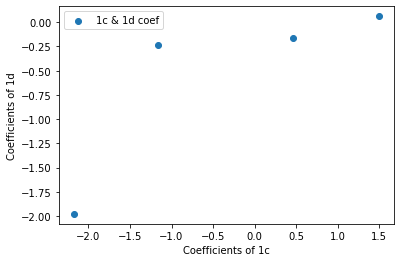

In [119]:
coeff = [-2.1713, -1.1681, 1.4899, 0.4557]
multi_coeff = [-1.977513,-0.233916,0.062083,-0.158054]

x_train_coeff = coeff.copy()
x_train_coeff = sm.add_constant(x_train_coeff, prepend = False)
#print(x_train_coeff)

fit_coeff = sm.OLS(multi_coeff, x_train_coeff).fit()
sum_coeff = fit_coeff.summary()
print(sum_all)

pred_coeff = fit_coeff.predict(x_train_coeff)
plt.scatter(coeff, multi_coeff, label = '1c & 1d coef')
plt.xlabel('Coefficients of 1c')
plt.ylabel('Coefficients of 1d')
plt.legend()
plt.show()

The results from 1c to 1d are both significant(p < 0.05) but only AT, AP, RH coefficients seem to follow a linear pattern. Coef V is slightly outside the linear pattern. The R^2 shows the model explains a good amount of variation.

Problem 1
    (f) 
       Is there evidence of nonlinear association between any of the 
       predictors and the response? To answer this question, for each 
       predictor X, fit a model of the form

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                 4.674e+04
Date:                Fri, 26 Feb 2021   Prob (F-statistic):               0.00
Time:                        20:42:45   Log-Likelihood:                -29350.
No. Observations:                9568   AIC:                         5.871e+04
Df Residuals:                    9565   BIC:                         5.873e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        505.9504      0.341   1484.226      0.0

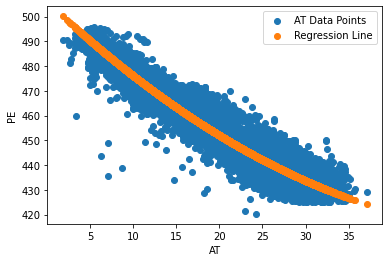

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                 1.646e+04
Date:                Fri, 26 Feb 2021   Prob (F-statistic):               0.00
Time:                        20:42:46   Log-Likelihood:                -33588.
No. Observations:                9568   AIC:                         6.718e+04
Df Residuals:                    9565   BIC:                         6.720e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        576.0875      2.118    271.972      0.0

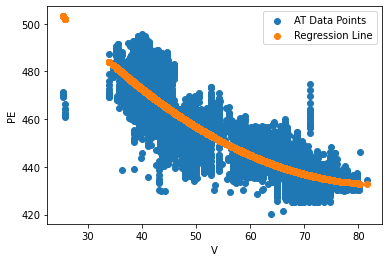

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     1815.
Date:                Fri, 26 Feb 2021   Prob (F-statistic):               0.00
Time:                        20:42:46   Log-Likelihood:                -39183.
No. Observations:                9568   AIC:                         7.837e+04
Df Residuals:                    9565   BIC:                         7.839e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.676e+04   3045.711      8.788      0.0

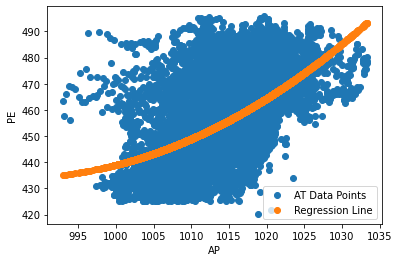

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     857.7
Date:                Fri, 26 Feb 2021   Prob (F-statistic):               0.00
Time:                        20:42:47   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9565   BIC:                         7.989e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        424.7197      3.138    135.359      0.0

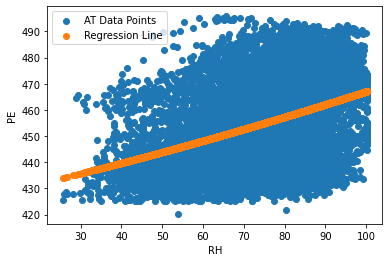

In [114]:
from sklearn.preprocessing import PolynomialFeatures

# AT
x_train_AT = data['AT'].copy()
x_train_AT = x_train_AT.to_numpy().reshape(-1,1)
poly_AT = PolynomialFeatures(degree = 2).fit_transform(x_train_AT)
fit_AT = sm.OLS(data['PE'], poly_AT).fit()
sum_AT = fit_AT.summary()
print(sum_AT)

pred_AT = fit_AT.predict(poly_AT)
plt.scatter(data['AT'], data['PE'], label = 'AT Data Points')
plt.scatter(data['AT'], pred_AT, label = 'Regression Line')
plt.xlabel('AT')
plt.ylabel('PE')
plt.legend()
plt.show()

# V
x_train_V = data['V'].copy()
x_train_V = x_train_V.to_numpy().reshape(-1,1)
poly_V = PolynomialFeatures(degree = 2).fit_transform(x_train_V)
fit_V = sm.OLS(data['PE'], poly_V).fit()
sum_V = fit_V.summary()
print(sum_V)

pred_V = fit_V.predict(poly_V)
plt.scatter(data['V'], data['PE'], label = 'AT Data Points')
plt.scatter(data['V'], pred_V, label = 'Regression Line')
plt.xlabel('V')
plt.ylabel('PE')
plt.legend()
plt.show()

# AP
x_train_AP = data['AP'].copy()
x_train_AP = x_train_AP.to_numpy().reshape(-1,1)
poly_AP = PolynomialFeatures(degree = 2).fit_transform(x_train_AP)
fit_AP = sm.OLS(data['PE'], poly_AP).fit()
sum_AP = fit_AP.summary()
print(sum_AP)

pred_AP = fit_AP.predict(poly_AP)
plt.scatter(data['AP'], data['PE'], label = 'AT Data Points')
plt.scatter(data['AP'], pred_AP, label = 'Regression Line')
plt.xlabel('AP')
plt.ylabel('PE')
plt.legend()
plt.show()

# RH
x_train_RH = data['RH'].copy()
x_train_RH = x_train_RH.to_numpy().reshape(-1,1)
poly_RH = PolynomialFeatures(degree = 2).fit_transform(x_train_RH)
fit_RH = sm.OLS(data['PE'], poly_RH).fit()
sum_RH = fit_RH.summary()
print(sum_RH)

pred_RH = fit_RH.predict(poly_RH)
plt.scatter(data['RH'], data['PE'], label = 'AT Data Points')
plt.scatter(data['RH'], pred_RH, label = 'Regression Line')
plt.xlabel('RH')
plt.ylabel('PE')
plt.legend()
plt.show()

Models AT, V, and AP all show slight signs of nonlinear association but the RH model does not. All p-values still show that the predictors are significance. Both AT and V show there is a good amount of varation explained within the R^2 but AP and RH have low R^2 meaning varation is not well explained.

Problem 1
    (g) 
       Is there evidence of association of interactions of predictors 
       with the response? To answer this question, run a full linear 
       regression model with all pairwise interaction terms and state 
       whether any interaction terms are statistically significant.

In [120]:
# multiply all columns
x_train_all = data[['AT', 'V', 'AP', 'RH']].copy()
#x_train_all = x_train_all.to_numpy().reshape(-1,1)
poly_all = PolynomialFeatures(degree = 2, interaction_only = True).fit_transform(x_train_all)
fit_all = sm.OLS(data['PE'], poly_all).fit()
sum_all = fit_all.summary()
print(sum_all)

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Fri, 26 Feb 2021   Prob (F-statistic):               0.00
Time:                        20:54:57   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        685.7825     78.640      8.721      0.0

All interactions show association of interactions expect for x1, x6, and x9. Those interactions have p-values greater than 0.05. The R^2 shows that model explains a good amount of variation in this set of data. 

Problem 1
    (h) 
       KNN Regression: Perform k-nearest neighbor regression for this 
       dataset using both normalized and raw features. Find the value of 
       k (1,2, ....100) that gives you the best fit. Plot the train and 
       test errors in terms of 1=k. (15 pts)

8


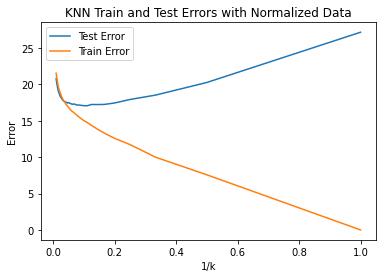

5


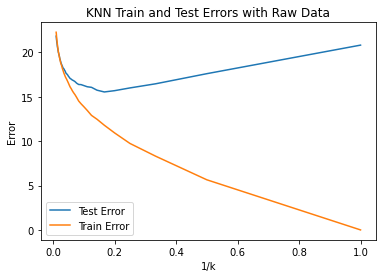

In [121]:

# NORMALIZED DATA

# normalize features
transformer = Normalizer().fit(data[['AT', 'V', 'AP', 'RH']])
x_norm = transformer.transform(data[['AT', 'V', 'AP', 'RH']])
y = data['PE'].copy()

# create test & train variables
x_train_norm, x_test_norm, y_train_norm, y_test_norm = train_test_split(x_norm, y, test_size=0.33, random_state = 40)


# pre-create arrays
train_norm_error = []
test_norm_error = []
plot_k = []

# use for loop 1-100 for k
for k in range (1, 100):
    
    # use KNN regression
    classifier = KNeighborsRegressor(n_neighbors = k)
    # fit x & y train data
    classifier.fit(x_train_norm, y_train_norm)
    
    # predict with x test data
    y_pred = classifier.predict(x_test_norm) 
    # obtain accuracy of K for test data
    test_norm_error.append(mean_squared_error(y_test_norm, y_pred))
    
    # predict with x train data
    y_train_pred = classifier.predict(x_train_norm)
    # obtain accuracy of K for train data
    train_norm_error.append(mean_squared_error(y_train_norm, y_train_pred))
    
    # find 1/k for plot
    plot_k.append(1/k)

 
# find best fit k
knn = test_norm_error.index(min(test_norm_error))
print(knn)

# Plot
plt.title("KNN Train and Test Errors with Normalized Data")
plt.plot(plot_k, test_norm_error, label ="Test Error")
plt.plot(plot_k, train_norm_error, label ="Train Error")
plt.legend()
plt.xlabel('1/k')
plt.ylabel('Error')
plt.show()

# RAW FEATURES KNN REGRESSION

x = data[['AT', 'V', 'AP', 'RH']].copy()
y = data['PE'].copy()

# create test & train variables
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state = 40)

# pre-create arrays
train_error = []
test_error = []
plot_k = []

# use for loop 1-100 for k
for k in range (1, 100):
    
    # use KNN regression
    classifier = KNeighborsRegressor(n_neighbors = k)
    # fit x & y train data
    classifier.fit(x_train, y_train)
    
    # predict with x test data
    y_pred = classifier.predict(x_test) 
    # obtain accuracy of K for test data
    test_error.append(mean_squared_error(y_test, y_pred))
    
    # predict with x train data
    y_train_pred = classifier.predict(x_train)
    # obtain accuracy of K for train data
    train_error.append(mean_squared_error(y_train, y_train_pred))
    
    plot_k.append(1/k)
 

# find best fit k
knn = test_error.index(min(test_error))
print(knn)

#plot
plt.title("KNN Train and Test Errors with Raw Data")
plt.plot(plot_k, test_error, label ="Test Error")
plt.plot(plot_k, train_error, label ="Train Error")
plt.legend()
plt.xlabel('1/k')
plt.ylabel('Error')
plt.show()